**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project.R")))
show_env()

BASE DIRECTORY (FD_BASE): /hpc/group/igvf/kk319 
REPO DIRECTORY (FD_REPO): /hpc/group/igvf/kk319/repo 
WORK DIRECTORY (FD_WORK): /hpc/group/igvf/kk319/work 
DATA DIRECTORY (FD_DATA): /hpc/group/igvf/kk319/data 

You are working with      IGVF BlueSTARR 
PATH OF PROJECT (FD_PRJ): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR 
PROJECT RESULTS (FD_RES): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/results 
PROJECT SCRIPTS (FD_EXE): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/scripts 
PROJECT DATA    (FD_DAT): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/data 
PROJECT NOTE    (FD_NBK): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/notebooks 
PROJECT DOCS    (FD_DOC): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/docs 
PROJECT LOG     (FD_LOG): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/log 
PROJECT REF     (FD_REF): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/references 



## Import data

In [2]:
### set file directory
txt_fdiry = file.path(FD_RES, "predict_variant_kircher2019")
txt_fname = "result.alphagenome.K562.ATAC.2KB.variant.summary.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_variant_summary = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 39376    10


Region,Position,Ref,Alt,Variant_ID,Scored_Interval,Output_Type,Gene_Name,Raw_Score,Quantile_Score
chr11:5227021-5227208,5227021,G,G,chr11:5227022:G>G,chr11:5225998-5228046:.,ATAC,NA,0.0000000,-0.0115355
chr11:5227021-5227208,5227021,G,C,chr11:5227022:G>C,chr11:5225998-5228046:.,ATAC,NA,-0.0144067,-0.4312567
chr11:5227021-5227208,5227021,G,A,chr11:5227022:G>A,chr11:5225998-5228046:.,ATAC,NA,0.0356374,0.7379445


## Explore: Regions and variants

In [3]:
dat = dat_region_variant_summary
tmp = dat %>% dplyr::select(Region, Position) %>% dplyr::distinct()

vec = unique(tmp$Region)
cat("#Region:  ", length(vec), "\n")
cat("#Position:", nrow(tmp),   "\n")

vec = unique(dat$Variant_ID)
cat("#Position:", length(vec), "\n")

#Region:   45 
#Position: 9844 
#Position: 39376 


## Explore: Missing values

In [4]:
dat = dat_region_variant_summary
dat = dat %>% dplyr::mutate(IsNa = is.na(Raw_Score))
dat = dat %>% dplyr::select(Region, Position, IsNa) %>% dplyr::distinct()
print(dim(dat))

res = table(dat$IsNa)
print(res)

[1] 9844    3

FALSE 
 9844 


In [5]:
fun_region_label = function(num_count_total, num_count_missing){
    if (num_count_total == num_count_missing){
        return("All missing")
    }

    if (num_count_missing == 0){
        return("No missing")
    }

    if (num_count_total > num_count_missing){
        return("Partially missing")
    }
}

In [6]:
dat = dat_region_variant_summary
dat = dat %>% dplyr::mutate(IsNa = is.na(Raw_Score))
dat = dat %>% dplyr::select(Region, Position, IsNa) %>% dplyr::distinct()
dat = dat %>% 
    dplyr::group_by(Region) %>% 
    dplyr::summarise(
        `Count Position Total`   = n(), 
        `Count Position Missing` = sum(IsNa),
        .groups = "drop"
    )

dat = dat %>%
    dplyr::rowwise() %>%
    dplyr::mutate(Label = fun_region_label(`Count Position Total`, `Count Position Missing`)) %>%
    dplyr::ungroup()

print(dim(dat))

res = table(dat$Label)
print(res)

fun_markdown_table(dat)

[1] 45  4

No missing 
        45 




|Region                    | Count Position Total| Count Position Missing|Label      |
|:-------------------------|--------------------:|----------------------:|:----------|
|chr10:112998239-112998439 |                  200|                      0|No missing |
|chr10:112998439-112998639 |                  200|                      0|No missing |
|chr10:112998639-112998839 |                  200|                      0|No missing |
|chr10:43086478-43086678   |                  200|                      0|No missing |
|chr10:43086678-43086878   |                  200|                      0|No missing |
|chr10:43086878-43087078   |                  200|                      0|No missing |
|chr10:46046243-46046538   |                  295|                      0|No missing |
|chr10:46046538-46046834   |                  296|                      0|No missing |
|chr11:5227021-5227208     |                  187|                      0|No missing |
|chr11:5249804-5250078     |             

In [7]:
dat = dat_region_variant_summary
dat = dat %>% dplyr::mutate(IsNa = is.na(Raw_Score))
dat = dat %>% dplyr::select(Region, Position, IsNa) %>% dplyr::distinct()
dat = dat %>% 
    dplyr::group_by(Region) %>% 
    dplyr::summarise(
        `Count Position Total`   = n(), 
        `Count Position Missing` = sum(IsNa),
        .groups = "drop"
    )
print(dim(dat))
fun_markdown_table(dat)

[1] 45  3




|Region                    | Count Position Total| Count Position Missing|
|:-------------------------|--------------------:|----------------------:|
|chr10:112998239-112998439 |                  200|                      0|
|chr10:112998439-112998639 |                  200|                      0|
|chr10:112998639-112998839 |                  200|                      0|
|chr10:43086478-43086678   |                  200|                      0|
|chr10:43086678-43086878   |                  200|                      0|
|chr10:43086878-43087078   |                  200|                      0|
|chr10:46046243-46046538   |                  295|                      0|
|chr10:46046538-46046834   |                  296|                      0|
|chr11:5227021-5227208     |                  187|                      0|
|chr11:5249804-5250078     |                  274|                      0|
|chr19:11089230-11089389   |                  159|                      0|
|chr19:11089389-1108954

## Explore: Gene target

In [18]:
dat = dat_region_variant_summary
dat = dat %>% dplyr::select(Region, Gene_Name) %>% dplyr::distinct() %>% tidyr::drop_na()
fun_markdown_table(dat)



|Region                   |Gene_Name       |
|:------------------------|:---------------|
|chr11:5227021-5227208    |HBB             |
|chr11:5249804-5250078    |HBG1            |
|chr20:44355519-44355804  |HNF4A           |
|chr20:44355519-44355804  |R3HDML-AS1      |
|chr5:1294988-1295247     |TERT            |
|chrX:139530462-139530613 |F9              |
|chrX:139530613-139530765 |F9              |
|chr2:60494939-60495139   |ENSG00000233953 |
|chr2:60495139-60495339   |ENSG00000233953 |
|chr2:60495339-60495539   |ENSG00000233953 |
|chr8:127400828-127401028 |CCAT2           |
|chr8:127401028-127401228 |CCAT2           |
|chr8:127401228-127401428 |CCAT2           |
|chr9:97853254-97853454   |FOXE1           |
|chr9:97853254-97853454   |PTCSC2          |
|chr9:97853454-97853654   |FOXE1           |
|chr9:97853454-97853654   |PTCSC2          |
|chr9:97853654-97853854   |FOXE1           |
|chr9:97853654-97853854   |PTCSC2          |
|chr22:19723265-19723457  |GP1BB           |
|chr22:1

In [19]:
dat = dat_region_variant_summary
dat = dat %>% dplyr::select(Region, Gene_Name) %>% dplyr::distinct() %>% tidyr::drop_na()
dat = dat %>% 
    dplyr::group_by(Region) %>% 
    dplyr::summarise(Count = n(), .groups = "drop")

print(dim(dat))
table(dat$Count)

[1] 23  2



 1  2 
19  4 

## Explore: Score distribution

In [9]:
dat = dat_region_variant_summary
head(dat)

Region,Position,Ref,Alt,Variant_ID,Scored_Interval,Output_Type,Gene_Name,Raw_Score,Quantile_Score
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>
chr11:5227021-5227208,5227021,G,G,chr11:5227022:G>G,chr11:5225998-5228046:.,ATAC,NA,0.00000000,-0.01153548
chr11:5227021-5227208,5227021,G,C,chr11:5227022:G>C,chr11:5225998-5228046:.,ATAC,NA,-0.01440668,-0.43125670
chr11:5227021-5227208,5227021,G,A,chr11:5227022:G>A,chr11:5225998-5228046:.,ATAC,NA,0.03563738,0.73794450
chr11:5227021-5227208,5227021,G,T,chr11:5227022:G>T,chr11:5225998-5228046:.,ATAC,NA,-0.03108215,-0.71620387
chr11:5227021-5227208,5227022,G,G,chr11:5227023:G>G,chr11:5225999-5228047:.,ATAC,NA,0.00000000,-0.01153548
chr11:5227021-5227208,5227022,G,C,chr11:5227023:G>C,chr11:5225999-5228047:.,ATAC,NA,0.03704786,0.75330776


In [11]:
dat = dat_region_variant_summary
#dat = dat %>% tidyr::drop_na()
dat = dat %>% dplyr::filter(Ref != Alt)
print(dim(dat))

[1] 29532    10


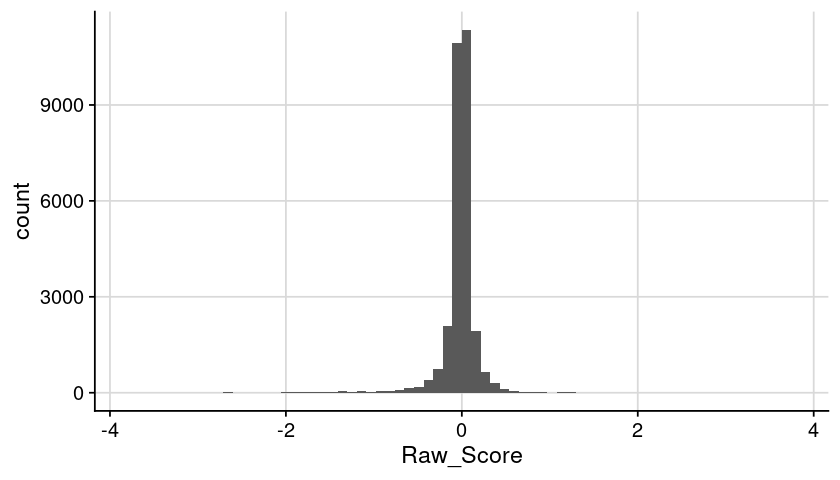

In [14]:
dat = dat_region_variant_summary
#dat = dat %>% tidyr::drop_na()
dat = dat %>% dplyr::filter(Ref != Alt)

gpt = ggplot(dat, aes(x=Raw_Score)) +
    geom_histogram(bins = 70) +
    theme_cowplot() +
    background_grid()


gpt_export_score_raw = gpt
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

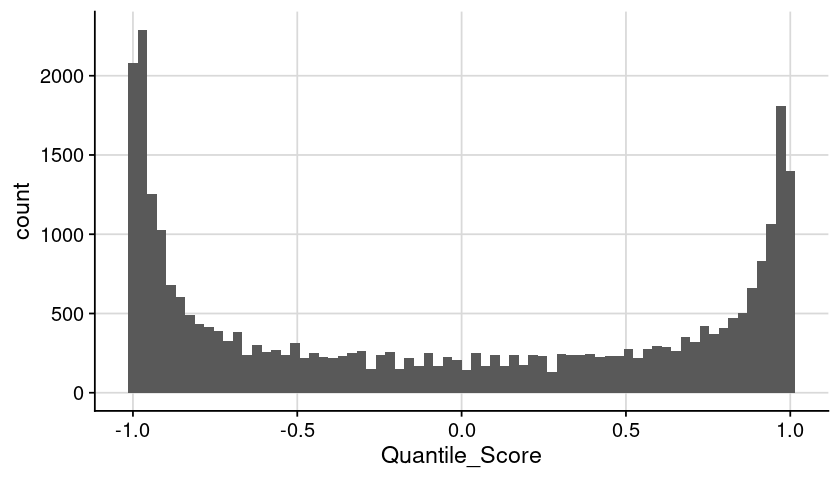

In [15]:
dat = dat_region_variant_summary
#dat = dat %>% tidyr::drop_na()
dat = dat %>% dplyr::filter(Ref != Alt)

gpt = ggplot(dat, aes(x=Quantile_Score)) +
    geom_histogram(bins = 70) +
    theme_cowplot() +
    background_grid()

gpt_export_score_quantile = gpt
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

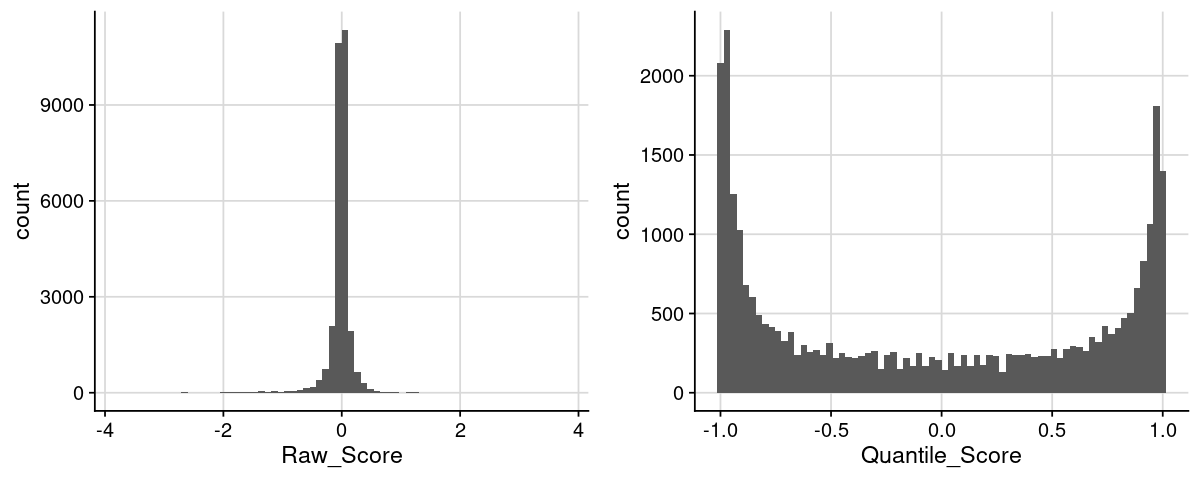

In [18]:
options(repr.plot.height=4, repr.plot.width=10)
plot_grid(
    gpt_export_score_raw,
    gpt_export_score_quantile,
    nrow = 1
)